# Notebook \#1 - Backpropagation Playground

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from __future__ import print_function

## [PART 1] Forward Pass: Single-Layer Neural Net 

### P10 - Common Activations functions:

In [5]:
# Activation functions:

def sig(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return (1 - np.exp(-2*z)) / (1 + np.exp(-2*z)) 

def relu(z):
    return np.maximum(z, 0)

# Derivative Activation functions:

def d_sig(z):
    return (1 - sig(z)) * sig(z)

def d_tanh(z):
    return 1 - tanh(z)**2

def d_relu(z):
    return np.where(z<0, z, 1).clip(min=0)

### P11 - Computing activations:

In [7]:
x = np.random.randn(2)*2                        # input vector

# FORWARD PASS =======================
# f = sigmoid(dot) 
# with dot = w.x

w = np.array([[2, -3], [1, 2], [0.5, -0.1]])   # 3 neurons (weigths)
dot = np.dot(w, x)
act = sig(dot)

# ------------------------------------
print("INPUTS : x =", x)
print("\nNEURAL NET : weights:\n", w)
print("\nDOT PRODUCT:", dot)
print("\nACTIVATIONS (SIGMOID):", act)


INPUTS : x = [ 2.84283827 -0.30058824]

NEURAL NET : weights:
 [[ 2.  -3. ]
 [ 1.   2. ]
 [ 0.5 -0.1]]

DOT PRODUCT: [ 6.58744125  2.24166179  1.45147796]

ACTIVATIONS (SIGMOID): [ 0.99862433  0.90392887  0.81022579]


### P12 - Plotting the activation functions:

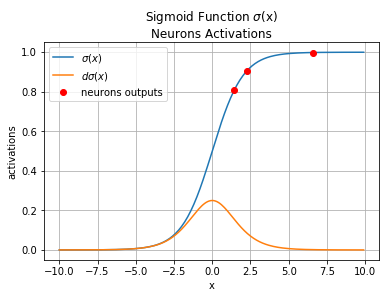

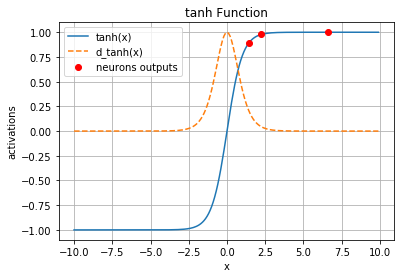

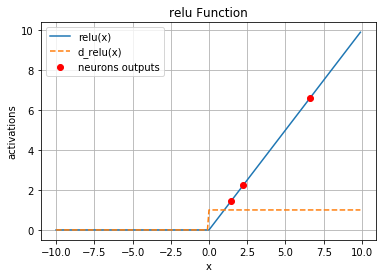

In [8]:
# Plotting:
zs = [(-10+i/10.0) for i in range(200)]

plt.plot(zs, [sig(i) for i in zs], label="${\sigma}(x)$")
plt.plot(zs, [d_sig(i) for i in zs], label="$d{\sigma}(x)$")
plt.plot(dot, act, 'ro', label="neurons outputs")
plt.grid(True)
plt.title("Sigmoid Function $\sigma$(x)\nNeurons Activations")
plt.legend()
plt.xlabel("x")
plt.ylabel("activations")

plt.figure()
plt.plot(zs, [tanh(i) for i in zs], label="tanh(x)")
plt.plot(zs, [d_tanh(i) for i in zs], '--', label="d_tanh(x)")
plt.plot(dot, tanh(dot), 'ro', label="neurons outputs")
plt.title("tanh Function")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("activations")

plt.figure()
plt.plot(zs, [relu(i) for i in zs], label="relu(x)")
plt.plot(zs, [d_relu(i) for i in zs], '--', label="d_relu(x)")
plt.plot(dot, relu(dot), 'ro', label="neurons outputs")
plt.title("relu Function")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("activations")


plt.show()

## [PART 2] Backpropagation : An Example

### Exercice 1:

Compute the gradient of the following function using *Automatic Differentiation*: 

$f(x, y) = \frac{x + {\sigma}(y)}{{\sigma}(x) + (x + y)^2} $ 

In [9]:
def f(x,y):
    sig_y = sig(y)                     # (1) : sig
    sig_x = sig(x)                     # (2) : sig
    sum_xy = x + y                     # (3) : sum
    sq_sum_xy = sum_xy**2              # (4) : squarre
    num = x + sig_y                    # (5) : sum
    den = sig_x + sq_sum_xy            # (6) : sum
    inv_den = 1 / den                  # (7) : inverse
    f = num * inv_den                  # (8) : multiplication
    return f

In [10]:
f(3,-4)

1.5456448841066441

In [11]:
def gradf(x,y):
    """
    Compute the gradient of the function f(x,y).
    """
    
    # forward pass:

    sig_y = sig(y)                     # (1) : sig
    sig_x = sig(x)                     # (2) : sig
    sum_xy = x + y                     # (3) : sum
    sq_sum_xy = sum_xy**2              # (4) : squarre
    num = x + sig_y                    # (5) : sum
    den = sig_x + sq_sum_xy            # (6) : sum
    inv_den = 1 / den                  # (7) : inverse
    f = num * inv_den                  # (8) : multiplication
    
    # backprop pass:

    df_dnum       = inv_den           # (8)
    df_dinv       = num               # (8)
    dinv_dden     = -1/(den**2)       # (7)
    dden_dsigx    = 1                 # (6)
    dden_dsq      = 1                 # (6)
    dnum_dx       = 1                 # (5)
    dnum_dsigy    = 1                 # (5)
    dsq_dsumxy    = 2*sum_xy          # (4)
    dsumxy_dx     = 1                 # (3)
    dsumxy_dy     = 1                 # (3)
    dsigx_dx      = d_sig(x)          # (2)
    dsigy_dy      = d_sig(y)          # (1)

    dx = df_dnum*dnum_dx + df_dinv*dinv_dden*(dden_dsigx*dsigx_dx + dden_dsq*dsq_dsumxy*dsumxy_dx)
    dy = df_dnum*dnum_dsigy*dsigy_dy + df_dinv*dinv_dden*dden_dsq*dsq_dsumxy*dsumxy_dy
    return [dx, dy]

In [12]:
def gradf_v2(x,y):
    """
    Compute the gradient of the function f(x,y).
    Same as before but a bit different.
    """
    
    # forward pass:

    sig_y = sig(y)                     # (1) : sig
    sig_x = sig(x)                     # (2) : sig
    sum_xy = x + y                     # (3) : sum
    sq = sum_xy**2                     # (4) : squarre
    num = x + sig_y                    # (5) : sum
    den = sig_x + sq                   # (6) : sum
    inv_den = 1 / den                  # (7) : inverse
    f = num * inv_den                  # (8) : multiplication
    
    # my backprop:

    df_dx,df_dy   = 0,0                               # init
    df_dnum       = 1.0 * inv_den                     # (8) mult
    df_dinv       = 1.0 * num                         # (8) mult
    df_dden       = df_dinv * -1/(den**2)             # (7) inv.
    df_dsigx      = df_dden * 1                       # (6) sum
    df_dsq        = df_dden * 1                       # (6) sum
    df_dx        += df_dnum * 1                       # (5) sum
    df_dsigy      = df_dnum * 1                       # (5) sum
    df_dsumxy     = df_dsq  * 2 * sum_xy              # (4) square 
    df_dx        += df_dsumxy * 1                     # (3) sum
    df_dy        += df_dsumxy * 1                     # (3) sum
    df_dx        += df_dsigx * d_sig(x)               # (2) sig
    df_dy        += df_dsigy * d_sig(y)               # (1) sig

    return [df_dx, df_dy]

In [14]:
# Testing - Compute the gradient of f(x,y) at (3,-4):
print(gradf(3,-4))
print(gradf_v2(3,-4))

[2.0595697955721652, 1.5922327514838093]
[2.0595697955721652, 1.5922327514838093]


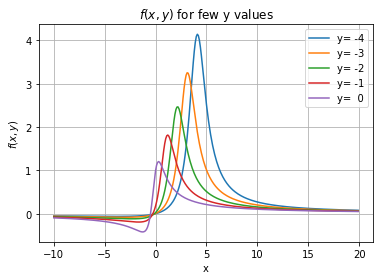

In [15]:
zs = [(-10+i/10.0) for i in range(300)]
plt.plot(zs, [f(i,-4) for i in zs], label='y= -4')
plt.plot(zs, [f(i,-3) for i in zs], label='y= -3')
plt.plot(zs, [f(i,-2) for i in zs], label='y= -2')
plt.plot(zs, [f(i,-1) for i in zs], label='y= -1')
plt.plot(zs, [f(i, 0) for i in zs], label='y=  0')
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("$f(x,y)$")
plt.title("$f(x,y)$ for few y values")
plt.show()

In [16]:
#fig = plt.figure()
#ax = Axes3D(fig)
# plot the 3D curve

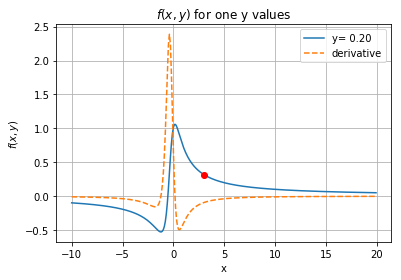

In [17]:
plt.figure()
y = np.random.randn()
zs = [(-10+i/10.0) for i in range(300)]
plt.plot(zs, [f(i, y) for i in zs], label="y= {:.2f} ".format(y))
plt.plot(zs, [gradf(i, y)[0] for i in zs], '--', label="derivative")
plt.plot(3, f(3, y), 'or')
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x,y)$")
plt.title("$f(x,y)$ for one y values")
plt.show()

### Exercice 2: 
Backprop of a the Single-Layer Neural Net 

In [18]:
def grad_sigmoid(W, x):
    # forward:
    z = W.dot(x)
    E = np.exp(-z)
    X = E + 1
    f = 1 / X
    
    # backprop:
    dX = -1 / X**2              # df_dX
    dE = 1 * dX                 # (df_dX) * dX_dE
    dz = -E * dE                # (df_dX * dE_dE) * dE_dz
    
    # can be simplify by doing dz = d_sig(z)
    
    x = x.reshape(1,-1)
    dz = dz.reshape(-1, 1)
    dW = dz.dot(x)              # (df_dX * dE_dE * dE_dz) * dz_dW
    
    return [f, dW]

In [21]:

W = np.array([[2, -3], [1, 2], [0.5, -0.1]])               
x = np.random.randn(2)*2                                   

acts, grads = grad_sigmoid(W, x)
print("ACTIVATIONS:", acts)
print("\nGRADS:\n", grads)

ACTIVATIONS: [ 0.74980142  0.99550172  0.76409202]

GRADS:
 [[ 0.49295078  0.26000045]
 [ 0.01176688  0.00620629]
 [ 0.47365351  0.24982235]]


In [25]:
print("Activations:", acts)
print("Update:")

for i in range(20):
    # update (gradient ascend):
    # show that the updates makes all the activations increase towards 1.
    W = W + 1.0 * grads
    acts, grads = grad_sigmoid(W, x)
    print("step {:3d}".format(i+1), ":" ,acts)

Activations: [ 0.74980142  0.99550172  0.76409202]
Update:
step   1 : [ 0.94009462  0.99567527  0.94081586]
step   2 : [ 0.96268168  0.99583587  0.96294207]
step   3 : [ 0.97254321  0.99598491  0.97268027]
step   4 : [ 0.97818216  0.9961236   0.97826741]
step   5 : [ 0.98185985  0.99625299  0.98191822]
step   6 : [ 0.9844575   0.99637399  0.98450007]
step   7 : [ 0.98639409  0.99648738  0.98642655]
step   8 : [ 0.98789547  0.99659387  0.98792107]
step   9 : [ 0.98909461  0.99669407  0.98911533]
step  10 : [ 0.99007505  0.99678851  0.99009217]
step  11 : [ 0.990892    0.9968777   0.99090639]
step  12 : [ 0.99158345  0.99696204  0.99159572]
step  13 : [ 0.99217642  0.99704193  0.992187  ]
step  14 : [ 0.99269065  0.99711772  0.99269988]
step  15 : [ 0.99314094  0.9971897   0.99314906]
step  16 : [ 0.99353857  0.99725817  0.99354576]
step  17 : [ 0.9938923   0.99732337  0.99389873]
step  18 : [ 0.99420906  0.99738553  0.99421483]
step  19 : [ 0.99449438  0.99744486  0.9944996 ]
step  20 :